# Shopping Hours for L.A. Seniors

In this assignment, I will be analyzing a dataset from the city of Los Angeles website titled "Grocery Stores in Los Angeles with Shopping Hours for Seniors." This information was particularly important during the early phase of the pandemic; when there was less information about the nature of how the virus spread, it was pivotal that seniors could get their groceries in a relatively safe and uncrowded environment. This dataset was published in May of 2020 and contains all 500 grocery stories in Los Angeles County that offered special hours for seniors as well as immunocompromised individuals.

I thought this would be cool to map because I can easily imagine its utility — if this was published on a website, a senior could easily navigate the map to find a store with senior-specific hours near their home.

To start, I'm going to import two libraries: geopandas to do my initial data exploration, and folium to make some maps later on.

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import folium

No errors, so I think I'm all good here. Next, I'm going to import my dataset — the aforementioned grocery stores in May of 2020 that were offering special hours for seniors.

In [7]:
stores=gpd.read_file('Grocery_Stores.csv')

Once again, no errors, so that means the dataset has successfully uploaded. Let's run a .shape command to see what it's looking like...

In [46]:
stores.shape

(498, 11)

That tells me my dataframe has 498 rows and 11 columns. That is what I expected, so we can proceed to running the .info command to get a sense of what our dataframe looks like.

In [47]:
stores.info

<bound method DataFrame.info of                 Store                 Address           City State Zip Code  \
0    NorthGate Market    2323 W. Olympic Blvd    Los Angeles    CA    90006   
1    NorthGate Market      425 S. Soto Street    Los Angeles    CA    90033   
2    NorthGate Market   944 E. Slauson Avenue    Los Angeles    CA    90011   
3    NorthGate Market   2633 Santa Ana Street     South Gate    CA    90280   
4    NorthGate Market     6801 S Atlantic Ave           Bell    CA    90201   
..                ...                     ...            ...   ...      ...   
493              Aldi       14626 Roscoe Blvd  Panorama City    CA    91402   
494              Aldi   16123 Bellflower Blvd     Bellflower    CA    90706   
495              Aldi     3330 W Century Blvd      Inglewood    CA    90303   
496              Aldi  203 Towne Center Drive        Compton    CA    90220   
497              Aldi          11530 South St       Cerritos    CA    90703   

                   

Okay, that's kind of messy. I've got all of the expected data in here, but it's not partiularly easy to process in this form. I'm going to try the .head command — I expect it to spit out the first five rows in a cleaner form.

In [48]:
stores.head()

,Store,Address,City,State,Zip Code,Hours,Phone,Web Link,Latitude,Longitude,geometry
0,NorthGate Market,2323 W. Olympic Blvd,Los Angeles,CA,90006,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",(213) 249-9173,https://www.northgatemarket.com/,34.052496,-118.283121,None
1,NorthGate Market,425 S. Soto Street,Los Angeles,CA,90033,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",(323) 262-0595,https://www.northgatemarket.com/,34.0398,-118.21254,None
2,NorthGate Market,944 E. Slauson Avenue,Los Angeles,CA,90011,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",(323) 846-8804,https://www.northgatemarket.com/,33.98912,-118.25799,None
3,NorthGate Market,2633 Santa Ana Street,South Gate,CA,90280,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",(323) 277-3000,https://www.northgatemarket.com/,33.964691,-118.223982,None
4,NorthGate Market,6801 S Atlantic Ave,Bell,CA,90201,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",(323) 562-2188,https://www.northgatemarket.com/,33.973764,-118.188151,None


Way better! This is giving me the first five rows as expected, and I can actually tell what's going on. Now, I'm going to run a .plot command to give me a picture of what my data looks like geographically.

<AxesSubplot:>

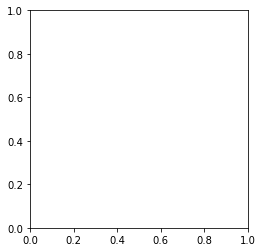

In [49]:
stores.plot()

That's weird... I figured that we'd see a map of each store because of the latitude/longitude coordinates. My guess for why it didn't plot is because the lat/long columns are not geometry d-types. I'm going to confirm by running a .info() command.


In [50]:
stores.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Store      498 non-null    object  
 1   Address    498 non-null    object  
 2   City       498 non-null    object  
 3   State      498 non-null    object  
 4   Zip Code   498 non-null    object  
 5   Hours      498 non-null    object  
 6   Phone      498 non-null    object  
 7   Web Link   498 non-null    object  
 8   Latitude   498 non-null    object  
 9   Longitude  498 non-null    object  
 10  geometry   0 non-null      geometry
dtypes: geometry(1), object(10)
memory usage: 42.9+ KB


Aha! Mystery solved — indeed, the lat/long columns are stored as objects. When I get to using folium later, I don't think this will be a problem.

Okay, returning to my standard data exploration. I'm going to run a value_counts command, hoping to get some information about the quantity in each column.

In [51]:
stores.value_counts()

Series([], dtype: int64)

That is not very informative. I now realize that the value_counts command only makes sense if I run it for a specific column. I'll try that instead, this time counting how many of each store exist in this dataframe.

In [22]:
stores.Store.value_counts()

99 Cents Store        93
Smart & Final         70
Walmart               34
Superior Grocers      31
Ralphs                30
Trader Joe's          29
Vallarta              27
Whole Foods Market    26
Costco                23
Food 4 Less           21
Target                20
NorthGate Market      19
Aldi                  19
Albertsons            17
Vons                  13
Big Saver Foods        9
Gelsons                6
Super A Foods          6
Stater Bros Market     4
Grocery Outlet         1
Name: Store, dtype: int64

Way better. Now I can see that the chain of store with the most hours of seniors is the 99 Cent Store, followed by Smart & Final. Erewhon, meanwhile, is nowhere to be found...

Now it's time to filter the data. There's a bunch of columns that I don't need, so I'm going to create a trimmed dataset.

In [31]:
desired_columns=['Store','Address','City','State','Zip Code','Hours','Latitude','Longitude']
stores_trimmed=stores[desired_columns].copy()

No errors, so I'm going to assume I now have a new dataframe — stores_trimmed, with just the essential info. I'm gonna make sure it looks okay by running a .head command...

In [32]:
stores_trimmed.head()

,Store,Address,City,State,Zip Code,Hours,Latitude,Longitude
0,NorthGate Market,2323 W. Olympic Blvd,Los Angeles,CA,90006,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",34.052496,-118.283121
1,NorthGate Market,425 S. Soto Street,Los Angeles,CA,90033,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",34.0398,-118.21254
2,NorthGate Market,944 E. Slauson Avenue,Los Angeles,CA,90011,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",33.98912,-118.25799
3,NorthGate Market,2633 Santa Ana Street,South Gate,CA,90280,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",33.964691,-118.223982
4,NorthGate Market,6801 S Atlantic Ave,Bell,CA,90201,"7 AM to 8 AM (65+, Deshabilitados, Embarazadas)",33.973764,-118.188151


Good stuff. I can see that the new dataframe is trimmed. Now onto the fun part — making a map with markers! To start, I'm going to try a for loop to make sure everything is working as intended...

In [33]:
for index, row in stores_trimmed.iterrows():
    print(row.Store, row.Latitude, row.Longitude)

NorthGate Market 34.052496 -118.283121
NorthGate Market 34.0398 -118.21254
NorthGate Market 33.98912 -118.25799
NorthGate Market 33.964691 -118.223982
NorthGate Market 33.973764 -118.188151
NorthGate Market 33.938062 -118.343885
NorthGate Market 33.960172 -118.107755
NorthGate Market 33.993463 -118.415368
NorthGate Market 33.896099 -118.193248
NorthGate Market 33.900355 -118.343028
NorthGate Market 34.075024 -118.021233
NorthGate Market 33.886576 -118.161801
NorthGate Market 33.913292 -118.083071
NorthGate Market 33.845297 -118.166981
NorthGate Market 34.034319 -117.950101
NorthGate Market 34.052631 -117.954434
NorthGate Market 33.795799 -118.193146
NorthGate Market 33.790241 -118.27721
NorthGate Market 33.778475 -118.167103
Vallarta 34.083488 -117.968736
Vallarta 34.02751 -118.200007
Vallarta 34.156827 -118.151582
Vallarta 34.233162 -118.439104
Vallarta 34.200261 -118.368592
Vallarta 34.200868 -118.594551
Vallarta 34.217929 -118.606297
Vallarta 34.417248 -118.457905
Vallarta 33.925517

That looks right to me! Okay, now I'm going in for the map. First, I'm going to define the folium map, using the coordinates of an Aldi store to center the map.

In [41]:
m = folium.Map(location=[33.85734,-118.087556])
m

That worked — I see Los Angeles! Alright, now it's time to run a for loop and hopefully drop some markers where the stores are. Here we go!

In [45]:
for index, row in stores_trimmed.iterrows():
    folium.Marker([row.Latitude, row.Longitude], popup=row.Hours, tooltip=row.Store).add_to(m)
m

Woohoo! I made a map! That was very satisfying. This map allows someone to browse over to stores with hours for seniors in their neighborhood; in the pop-up, it specifies the details (what time the store is open, on what days, any other relevant info.)

This has been fun and informative!